# TFG

In [2]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Testing split
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

testing the matrix build

In [3]:
# read data
csv_hour_file = '../data/hour_14_metrics.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df = df[['Datetime', 'MarginalES']]

# Date range for the training matrix
# train_start_date = '2018-01-01'
train_start_date = '2018-12-25'
train_end_date = '2022-01-01'

train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]



##### 

# probar con eso tambien
# error de retorno con 0s
#! sumarle 0,001 a todo para que nunca sea 0
#! limpiar numeros negativos
    # subsanado con limpieza y posterior interpolacion

# benchmark 1 precios absolutos - precios CHECK
# benchmark 2 precios relativos - retornos CHECK
# benchmark 3 indicadores tecnicos
    # 1. media movil
    # 2. momentum
    # 3. RSI
    # 4. añdir los precios absolutos o relativos
# benchmark 4 random forest - probably not good because it doesn't detect peaks - hace medias, entonces nunca sale el valor mas bajo



# precios reales y precios relativos

# Sliding window size
window_size = 3

In [4]:
#! Rename to create_sliding_window_weight_matrix
#! Rename to create_weight_matrix

# Function to create sliding windows of data
def create_sliding_window(data, window_size):
    X, y = [], []  # Initialize lists for input features (X) and target values (y)
    
    for i in range(len(data) - window_size):
        # Extract a window of size 'window_size' from the data
        X.append(data.iloc[i:i+window_size, 1:].values.flatten())  
        
        # The label is the value right after the current window
        y.append(data.iloc[i + window_size, 1])  
    
    # Convert the lists to DataFrame/Series for easier use in training
    return pd.DataFrame(X), pd.Series(y)

In [5]:
# Create sliding window matrix
X_train, y_train = create_sliding_window(train_subset_df, window_size)

Print to check the matrix

In [6]:
# print the shape of the matrix
print(X_train.shape, y_train.shape)

# print the actual matrix
print(X_train.head())
print(y_train.head())

# Lasso
# .coef_ da los pesos del modelo lineal
# las que sean cero o muy bajitas no van a tener peso en la decision

(1100, 3) (1100,)
       0      1      2
0  66.58  67.20  68.12
1  67.20  68.12  64.64
2  68.12  64.64  57.39
3  64.64  57.39  63.91
4  57.39  63.91  65.22
0    64.64
1    57.39
2    63.91
3    65.22
4    65.88
dtype: float64


## Build a simple regression model and train with the matrix

In [7]:
# Build a simple regression model and train with the matrix
model_lr = LinearRegression()

# Train with the training subset
model_lr.fit(X_train, y_train)

#! en vez de score llamar a predict y guardar los valors

#! bucle for
# predict


# Fit with the next subset up to the row before prediction

# Date range for the testing (fit) matrix
test_start_date = '2022-01-02'
# test_end_date = '2025-01-01'
test_end_date = '2025-03-17'

test_subset_df = df[(df['Datetime'] >= test_start_date) & (df['Datetime'] <= test_end_date)]

# Create sliding window matrix
X_test, y_test = create_sliding_window(test_subset_df, window_size)

#! ERROR - you cannot fit the regression again with test data - its retraining the whole thing
#! Fit the model w test data
# model_lr.fit(X_test, y_test)

# llamar a fit con toda la matriz, con la anchura ventana deslizante
# y altura num of days back

#! me falta score con test
# llama a predict con la x y compara con mis ys
# guardar errores y predicciones
# std dev
# percentil

#! pickle para guardar sets de numeros en vez de numpy ??

# Predict the target values
# y_pred = model_lr.predict(X) # SOLO la lonchita
# predict o score para otros modelos
####### sólo predict con la ultima fila
# y_pred = model_lr.predict(X_test) #! SOLO la lonchita ???
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test MSE: {mse}")

# mirar tambien Expectation Short-Fall
# mirar cual seria la peor prediccion
# la media del 5% peor de resultados
# buscar que el caso peor no sea tan malo?

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

###### Predict con la ultima fila
# llamar a predict con solo la ultima fila (ancho)
X_last = X_test.iloc[-1, :].values.reshape(1, -1)
y_pred = model_lr.predict(X_last)
# mse = mean_squared_error(y_test, y_pred)
print(f"x_last: {X_last}")
print(f"y_pred: {y_pred}")

# Calculate the mean squared error and R2 score
# mse = mean_squared_error(y, y_pred)
# print('Mean squared error:', mse)
# r2 = r2_score(y, y_pred)
# print('R2 score:', r2)

# # Print 20 y and y_pred to visualize the difference
# print('Actual vs Predicted')
# print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# # Plot the actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
# plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
# plt.legend()
# plt.show()

x_last: [[95.12 18.82  0.  ]]
y_pred: [22.87186634]


## Now with the return values

Pasos a seguir

Calcular el retorno (en vez de usar los precios)
Interpolar (rellenar valores)
Coger el set completo y partir en dos

Entrenar con la primera mitad (bloque 1 de datos)
    - Train

Coger todo el set de datos anterior a la fila que queremos (bloque 2 de datos)
    - Fit

Hacer predict de la siguiente fila al set de datos anterior (resultado a predecir)


In [8]:
# window_size = 30

# # read return data
# csv_hour_file = '../data/clean_return_data.csv'
# df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
# df = df[['Datetime', 'Return']]

# # Date range for the training matrix
# # train_start_date = '2018-01-01'
# train_start_date = '2018-12-25'
# train_end_date = '2022-01-01'

# train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]

# # Create sliding window matrix
# X_train, y_train = create_sliding_window(train_subset_df, window_size)

# # Build a simple regression model and train with the matrix
# model_lr = LinearRegression()

# # Train with the training subset
# # model_lr.train(X_train, y_train)
# model_lr.fit(X_train, y_train)


# # Fit with the next subset up to the row before prediction

# # Date range for the testing (fit) matrix
# test_start_date = '2022-01-02'
# # test_end_date = '2025-01-01'
# test_end_date = '2025-03-17'

# test_subset_df = df[(df['Datetime'] >= test_start_date) & (df['Datetime'] <= test_end_date)]

# # Create sliding window matrix
# X_test, y_test = create_sliding_window(test_subset_df, window_size)

# #! no usar sólo la lonchita - usar toda la matriz de la que considere que tengo memoria
# #! programar distintas ventanas fijas de memoria
# #! mirar el error que dan las distintas memorias y comparar
# y_pred = model_lr.predict(X_test) # SOLO la lonchita ??? NO error
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test MSE: {mse}")

# # linear regressor has mean error 0 that why we do error cuadratico o absoluto

# # llamar a predict con solo la ultima fila (ancho)
# X_last = X_test.iloc[-1, :].values.reshape(1, -1)
# y_pred = model_lr.predict(X_last)
# # mse = mean_squared_error(y_test, y_pred)
# print(f"x_last: {X_last}")
# print(f"y_pred: {y_pred}")

In [9]:
# For later on...
#! Build a simple random forest model and train with the matrix

# model_rf = sklearn RandomForest()
# model_rf.fit(X, y)

# # llamar a fit con toda la matriz, con la anchura ventana deslizante
# # y altura num of days back

# # Predict the target values
# y_pred = model_rf.predict(X)

# # llamar a predict con solo una fila (ancho)

# # Calculate the mean squared error and R2 score
# mse = mean_squared_error(y, y_pred)
# print('Mean squared error:', mse)
# r2 = r2_score(y, y_pred)
# print('R2 score:', r2)

# # Print 20 y and y_pred to visualize the difference
# print('Actual vs Predicted')
# print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# # Plot the actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
# plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
# plt.legend()
# plt.show()

## Añadiendo columnas
Calcularemos varias metricas con la libreria "ta" - technical analysis

### Próximos pasos
- Añadir columnas de métricas de precios
  - Media móvil corta (a pocos días)
  - Media móvil larga (a muchos días)
  - RSI
  - Volatilidad
  - Momentum
- Probar regresión otra vez
- Verificar con
  - MSE
  - RMSE
  - 95th percentil
  - R² modificado?
- Mirar foto - usar en el sumatorio de abajo, las etiquetas de train
- Probar Lasso
- Mirar error (distintas métricas)
- Mirar pesos que escoge - aprender del modelo


In [10]:
# Añadir columnas de metricas de precios
    # media movil corta (a pocos dias)
    # media movil larga (a muchos dias)
    # RSI
    # volatilidad
    # momentum

# probar regresion otra vez
    # verificar con
    # mse
    # rmse
    # 95th percentil

# R^2 modificado?
# mirar foto - usar en el sumatorio de abajo, las etiquetas de train

window_size = 30

# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'
# csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14'
# read return data
# csv_hour_file = '../data/ta_metrics/new_return_metrics_hour_14.csv'

df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

# split in two
# Train
# Test

#! Expandir esto para incluir nuevas metricas (mas columnas)
df_prices = df[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df.columns[1:]  # Exclude 'Datetime'
df = df[['Datetime'] + list(feature_columns)]

In [11]:
print(df_prices)

                Datetime  MarginalES
0    2018-12-25 14:00:00       66.58
1    2018-12-26 14:00:00       67.20
2    2018-12-27 14:00:00       68.12
3    2018-12-28 14:00:00       64.64
4    2018-12-29 14:00:00       57.39
...                  ...         ...
2052 2025-03-13 14:00:00       95.12
2053 2025-03-14 14:00:00       18.82
2054 2025-03-15 14:00:00        0.00
2055 2025-03-16 14:00:00       11.37
2056 2025-03-17 14:00:00       50.24

[2057 rows x 2 columns]


In [12]:
print(df)

                Datetime  MarginalES      SMA_3   SMA_5      SMA_7     SMA_14  \
0    2018-12-25 14:00:00       66.58  66.410000  65.486  65.254286  65.138571   
1    2018-12-26 14:00:00       67.20  66.806667  66.286  65.697143  65.027857   
2    2018-12-27 14:00:00       68.12  67.300000  66.910  66.107143  65.175000   
3    2018-12-28 14:00:00       64.64  66.653333  66.636  66.312857  65.188571   
4    2018-12-29 14:00:00       57.39  63.383333  64.786  65.225714  64.780714   
...                  ...         ...        ...     ...        ...        ...   
2052 2025-03-13 14:00:00       95.12  81.000000  65.484  48.034286  52.265000   
2053 2025-03-14 14:00:00       18.82  61.316667  67.828  49.605714  47.885714   
2054 2025-03-15 14:00:00        0.00  37.980000  52.364  49.462857  45.051429   
2055 2025-03-16 14:00:00       11.37  10.063333  39.064  50.072857  43.006429   
2056 2025-03-17 14:00:00       50.24  20.536667  35.110  46.204286  40.149286   

         SMA_30     SMA_60 

In [13]:
# Function to create the weight matrix, with the sliding window, and the columns of extra data points

# Right Alligned
# x1 x2 x3 sma_3
# sma_3 = x1+x2+x3 / 3
def create_sliding_window_more_columns(dataframe, window_size):
    X, y = [], []
    
    df_prices = dataframe[['Datetime', 'MarginalES']]
    df_features = dataframe.iloc[:, 2:]  # Exclude 'Datetime' and 'MarginalES'
    
    for i in range(window_size, len(df_prices)):
        # Extract sliding window for prices (right-aligned)
        window = df_prices.iloc[i-window_size:i, 1:].values.flatten()
        
        # Extract corresponding feature row
        feature_row = df_features.iloc[i-1].values.flatten()
        
        # Concatenate sliding window prices with feature row
        X.append(np.concatenate((window, feature_row)))
        y.append(df_prices.iloc[i, 1])
    
    return pd.DataFrame(X), pd.Series(y)

X_0313, y_0313 = create_sliding_window_more_columns(df, window_size=3)

print(X_0313)

         0      1      2          3       4          5          6          7   \
0     66.58  67.20  68.12  67.300000  66.910  66.107143  65.175000  65.195000   
1     67.20  68.12  64.64  66.653333  66.636  66.312857  65.188571  65.166333   
2     68.12  64.64  57.39  63.383333  64.786  65.225714  64.780714  64.948000   
3     64.64  57.39  63.91  61.980000  64.252  64.925714  65.259286  64.872000   
4     57.39  63.91  65.22  62.173333  63.856  64.722857  64.950714  64.954000   
...     ...    ...    ...        ...     ...        ...        ...        ...   
2049  77.32  77.87  70.01  75.066667  46.660  43.015714  51.827857  52.917333   
2050  77.87  70.01  95.12  81.000000  65.484  48.034286  52.265000  52.504667   
2051  70.01  95.12  18.82  61.316667  67.828  49.605714  47.885714  50.532000   
2052  95.12  18.82   0.00  37.980000  52.364  49.462857  45.051429  47.748667   
2053  18.82   0.00  11.37  10.063333  39.064  50.072857  43.006429  45.961000   

             8          9  

In [14]:
print(y_0313)

0       64.64
1       57.39
2       63.91
3       65.22
4       65.88
        ...  
2049    95.12
2050    18.82
2051     0.00
2052    11.37
2053    50.24
Length: 2054, dtype: float64


In [15]:
# Build a simple regression model and train with the matrix
model_lr_0313 = LinearRegression()

# Split X and y in half for training and testing
split_idx = len(X_0313) // 2
X_train_0313, X_test_0313 = X_0313.iloc[:split_idx], X_0313.iloc[split_idx:]
y_train_0313, y_test_0313 = y_0313.iloc[:split_idx], y_0313.iloc[split_idx:]

# Train with the training subset
model_lr_0313.fit(X_train_0313, y_train_0313)

# testing this
y_pred_0313 = model_lr_0313.predict(X_test_0313) #! SOLO la lonchita ???
mse = mean_squared_error(y_test_0313, y_pred_0313)
print(f"Test MSE: {mse}")

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313 = X_test_0313.iloc[-1, :].values.reshape(1, -1)
y_pred_0313 = model_lr_0313.predict(X_last_0313)
# mse = mean_squared_error(y_0313, y_pred_0313)
print(f"x_last_0313: {X_last_0313}")
print(f"y_pred_0313: {y_pred_0313}")

Test MSE: 4226.153038878388
x_last_0313: [[ 18.82         0.          11.37        10.06333333  39.064
   50.07285714  43.00642857  45.961       60.5865      66.43377778
   64.10238889  44.86916667  18.08092863  27.42915893  32.62976498
   40.32056101  47.81725882 -88.04667788 -85.39874149  60.14084507
  -77.36863057 -71.575      -82.50769231  38.63524426  41.4453365
   45.33512792]]
y_pred_0313: [54.00994039]


## Lasso
- mirar error (distintas metricas)
- mirar pesos que escoge - aprender del modelo

In [16]:
# Añadir columnas de metricas de precios
    # media movil corta (a pocos dias)
    # media movil larga (a muchos dias)
    # RSI
    # volatilidad
    # momentum

# probar regresion otra vez
    # verificar con
    # mse
    # rmse
    # 95th percentil

# R^2 modificado?
# mirar foto - usar en el sumatorio de abajo, las etiquetas de train

# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_lasso = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_lasso_prices = df_lasso[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_lasso.columns[1:]  # Exclude 'Datetime'
df_lasso = df_lasso[['Datetime'] + list(feature_columns)]

In [17]:
X_0313_lasso, y_0313_lasso = create_sliding_window_more_columns(df_lasso, window_size=3)

In [18]:
# Build a simple regression model and train with the matrix
model_lasso_0313 = Lasso()

# split in two
# Train
# Test

# Split X and y in half for training and testing
split_idx = len(X_0313_lasso) // 2
X_train_0313_lasso, X_test_0313_lasso = X_0313_lasso.iloc[:split_idx], X_0313_lasso.iloc[split_idx:]
y_train_0313_lasso, y_test_0313_lasso = y_0313_lasso.iloc[:split_idx], y_0313_lasso.iloc[split_idx:]

print(X_test_0313_lasso)

# Train with the training subset
model_lasso_0313.fit(X_train_0313_lasso, y_train_0313_lasso)

# testing this
y_pred_0313_lasso = model_lasso_0313.predict(X_test_0313_lasso) #! SOLO la lonchita ???
mse = mean_squared_error(y_test_0313_lasso, y_pred_0313_lasso)
print(f"Test MSE: {mse}")

#! Pending on 95th, 99th percentile errors ???

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313_lasso = X_test_0313_lasso.iloc[-1, :].values.reshape(1, -1)
# y_actual_0313_lasso = X_test_0313_lasso.
y_pred_0313_lasso = model_lasso_0313.predict(X_last_0313_lasso)
# mse = mean_squared_error(y_0313_lasso, y_pred_0313_lasso)
print(f"x_last_0313_lasso: {X_last_0313_lasso}")
# print(f"y_actual_0313_lasso: {y_actual_0313_lasso}")
print(f"y_pred_0313_lasso: {y_pred_0313_lasso}")

          0       1       2           3        4           5           6   \
1027  198.41  193.73  188.69  193.610000  201.760  196.632857  198.018571   
1028  193.73  188.69  179.70  187.373333  195.356  198.198571  197.037857   
1029  188.69  179.70  183.27  183.886667  188.760  195.967143  189.628571   
1030  179.70  183.27  188.69  183.886667  186.816  192.677143  189.620714   
1031  183.27  188.69  190.70  187.553333  186.210  189.027143  187.809286   
...      ...     ...     ...         ...      ...         ...         ...   
2049   77.32   77.87   70.01   75.066667   46.660   43.015714   51.827857   
2050   77.87   70.01   95.12   81.000000   65.484   48.034286   52.265000   
2051   70.01   95.12   18.82   61.316667   67.828   49.605714   47.885714   
2052   95.12   18.82    0.00   37.980000   52.364   49.462857   45.051429   
2053   18.82    0.00   11.37   10.063333   39.064   50.072857   43.006429   

              7           8           9   ...          16          17  \
10

In [19]:
# Get the coefficients (weights)
print(model_lasso_0313.coef_)

# Get the intercept (bias term)
print(model_lasso_0313.intercept_)

[-0.00000000e+00  3.97052723e-02  4.86430415e-01  0.00000000e+00
 -9.61532855e-01  1.35026253e+00 -0.00000000e+00  0.00000000e+00
  1.38355989e-01  2.54449188e-02  0.00000000e+00 -5.87676183e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -7.23230653e-04 -4.11398233e-04  9.32660027e-05
  2.29405100e-04 -1.52468269e-04  2.27829254e-04  6.13576575e-02
  0.00000000e+00 -0.00000000e+00]
-3.525253938443555


## Ridge

In [20]:
# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_ridge = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_ridge_prices = df_ridge[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_ridge.columns[1:]  # Exclude 'Datetime'
df_ridge = df_ridge[['Datetime'] + list(feature_columns)]

X_0313_ridge, y_0313_ridge = create_sliding_window_more_columns(df_ridge, window_size=3)

In [21]:
# Build a simple regression model and train with the matrix
model_ridge_0313 = Ridge()

# split in two
# Train
# Test

# Split X and y in half for training and testing
split_idx = len(X_0313_ridge) // 2
X_train_0313_ridge, X_test_0313_ridge = X_0313_ridge.iloc[:split_idx], X_0313_ridge.iloc[split_idx:]
y_train_0313_ridge, y_test_0313_ridge = y_0313_ridge.iloc[:split_idx], y_0313_ridge.iloc[split_idx:]

print(X_test_0313_ridge)

# Train with the training subset
model_ridge_0313.fit(X_train_0313_ridge, y_train_0313_ridge)

# testing this
y_pred_0313_ridge = model_ridge_0313.predict(X_test_0313_ridge) # SOLO la ultima fila
mse = mean_squared_error(y_test_0313_ridge, y_pred_0313_ridge)
print(f"Test MSE: {mse}")

#! Pending on 95th, 99th percentile errors ???


# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313_ridge = X_test_0313_ridge.iloc[-1, :].values.reshape(1, -1)
# y_actual_0313_ridge = X_test_0313_ridge.
y_pred_0313_ridge = model_ridge_0313.predict(X_last_0313_ridge)
# mse = mean_squared_error(y_0313_ridge, y_pred_0313_ridge)
print(f"x_last_0313_ridge: {X_last_0313_ridge}")
# print(f"y_actual_0313_ridge: {y_actual_0313_ridge}")
print(f"y_pred_0313_ridge: {y_pred_0313_ridge}")

          0       1       2           3        4           5           6   \
1027  198.41  193.73  188.69  193.610000  201.760  196.632857  198.018571   
1028  193.73  188.69  179.70  187.373333  195.356  198.198571  197.037857   
1029  188.69  179.70  183.27  183.886667  188.760  195.967143  189.628571   
1030  179.70  183.27  188.69  183.886667  186.816  192.677143  189.620714   
1031  183.27  188.69  190.70  187.553333  186.210  189.027143  187.809286   
...      ...     ...     ...         ...      ...         ...         ...   
2049   77.32   77.87   70.01   75.066667   46.660   43.015714   51.827857   
2050   77.87   70.01   95.12   81.000000   65.484   48.034286   52.265000   
2051   70.01   95.12   18.82   61.316667   67.828   49.605714   47.885714   
2052   95.12   18.82    0.00   37.980000   52.364   49.462857   45.051429   
2053   18.82    0.00   11.37   10.063333   39.064   50.072857   43.006429   

              7           8           9   ...          16          17  \
10

In [22]:
# Get the coefficients (weights)
print(model_ridge_0313.coef_)

# Get the intercept (bias term)
print(model_ridge_0313.intercept_)

[ 1.56445343e-04 -7.63577677e-01 -2.29910070e+00 -1.02084065e+00
 -1.67716248e+00  2.90427296e+00  9.13063312e-01 -8.55665430e-01
 -4.25424877e-01 -7.56570868e-02  5.84133381e-02 -1.14686852e-01
  9.75737644e+00 -9.79163222e-01 -5.75200331e+00 -2.14902160e+00
  3.49277389e+00 -8.77525474e-04 -2.54436353e-04 -1.98173764e-04
  3.59788517e-04 -2.92601203e-04  2.31507483e-04  1.15942049e+00
 -2.17093094e+00  1.25391523e+00]
-12.224933961333633


In [23]:
# # Scatter plot of actual vs predicted values
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test_0313_ridge, y_pred_0313_ridge, alpha=0.5, color="blue", label="Predicted vs Actual")
# plt.plot([min(y_test_0313_ridge), max(y_test_0313_ridge)], [min(y_test_0313_ridge), max(y_test_0313_ridge)], color="red", linestyle="dashed", label="Perfect Fit")
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Random Forest: Predictions vs Actual")
# plt.legend()
# plt.grid(True)
# plt.show()


## Random Forest

In [24]:
# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_randomforest = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_randomforest_prices = df_randomforest[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_randomforest.columns[1:]  # Exclude 'Datetime'
df_randomforest = df_randomforest[['Datetime'] + list(feature_columns)]

X_0313_randomforest, y_0313_randomforest = create_sliding_window_more_columns(df_randomforest, window_size=3)

In [25]:
# Split data
X_train_0313_randomforest, X_test_0313_randomforest, y_train_0313_randomforest, y_test_0313_randomforest = train_test_split(X_0313_randomforest, y_0313_randomforest, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_0313_randomforest, y_train_0313_randomforest)

# Predictions
X_last_0313_randomforest = X_test_0313_randomforest.iloc[-1, :].values.reshape(1, -1)
y_pred_0313_randomforest = rf.predict(X_test_0313_randomforest)
print(f"x_last_0313_randomforest: {X_last_0313_randomforest}")
print(f"y_pred_0313_randomforest: {y_pred_0313_randomforest}")

# Evaluate model
mse = mean_squared_error(y_test_0313_randomforest, y_pred_0313_randomforest)
r2 = r2_score(y_test_0313_randomforest, y_pred_0313_randomforest)

print(f"Random Forest MSE: {mse:.4f}")
print(f"Random Forest R²: {r2:.4f}")

#! Pending on 95th, 99th percentile errors ???

x_last_0313_randomforest: [[140.37       114.1        149.76       134.74333333 146.178
  152.91       144.15571429 129.28833333 113.696      105.55433333
   85.12344444  63.54377778 140.69363966 142.86407028 144.08886906
  142.03518212 132.22444532   6.46950092 -14.78320246  -3.89527049
   15.6626506   18.48101266  43.29729213  53.15319391  52.92343513
   53.55157464]]
y_pred_0313_randomforest: [ 35.2357  28.3856  98.8688  66.0404 212.3505  44.4116  28.2197  29.8378
 108.8157 319.2876 101.1049  85.7032 181.2506 118.5161  53.9416  35.734
 116.0221  96.8449 402.0415 183.1105 183.2599  24.4243  35.5168  51.6001
  50.3734  38.4022  34.8677  96.4114 128.1438  24.5739  58.2824  41.018
  53.4063  96.7097  45.923   43.4345 110.7641  34.5534  65.2409  78.5119
  26.7931  48.9809  51.1232  44.2501 142.6149  69.9474  77.1227  19.8414
 133.7734  36.4422  29.5831  31.8077  43.406  141.5912  95.2426  67.7403
 185.1804  45.3406 129.0186  10.0743  58.0612  22.3413  33.1821  37.8778
  33.4831 121.0888 

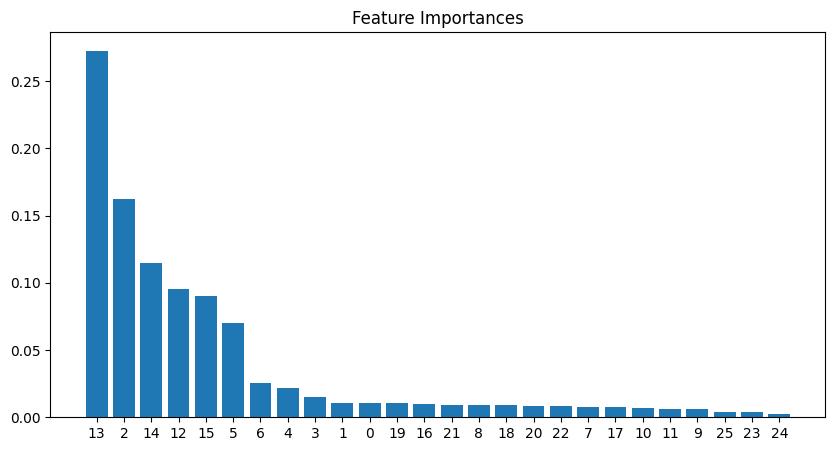

In [26]:
# Get feature importance
feature_importance = rf.feature_importances_

# Sort and plot
indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_0313_randomforest.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X_0313_randomforest.shape[1]), indices)
plt.show()

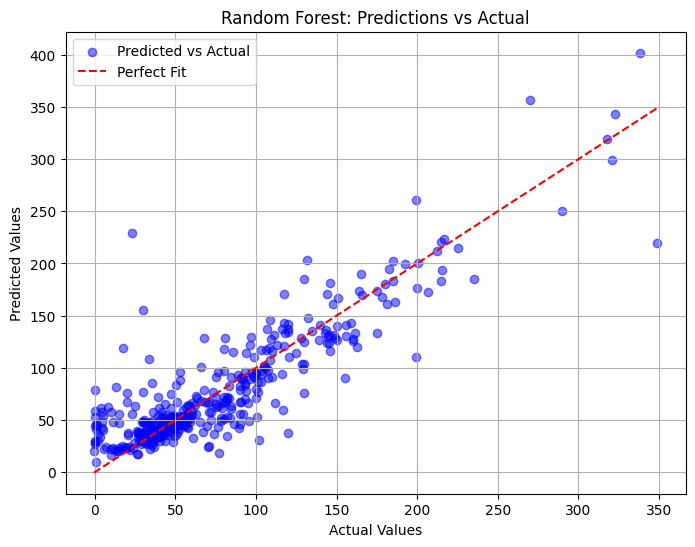

In [27]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_0313_randomforest, y_pred_0313_randomforest, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test_0313_randomforest), max(y_test_0313_randomforest)], [min(y_test_0313_randomforest), max(y_test_0313_randomforest)], color="red", linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()


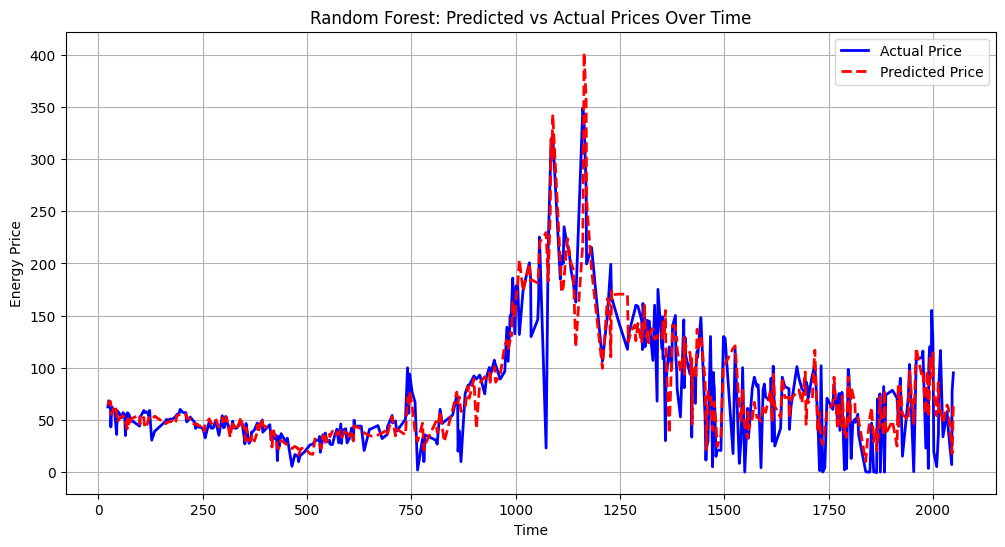

In [28]:
# Assuming X_test has a DateTime index or a corresponding time column
time_series = X_test_0313_randomforest.index if isinstance(X_test_0313_randomforest, pd.DataFrame) else range(len(y_test_0313_randomforest))

# Sort values by time (just in case)
sorted_indices = np.argsort(time_series)
time_series_sorted = np.array(time_series)[sorted_indices]
y_test_sorted = np.array(y_test_0313_randomforest)[sorted_indices]
y_pred_sorted = np.array(y_pred_0313_randomforest)[sorted_indices]

# Plot actual vs predicted over time
plt.figure(figsize=(12, 6))
plt.plot(time_series_sorted, y_test_sorted, label="Actual Price", color="blue", linewidth=2)
plt.plot(time_series_sorted, y_pred_sorted, label="Predicted Price", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Energy Price")
plt.title("Random Forest: Predicted vs Actual Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Random forest tiende a suavizar
# No es capaz de predecir el pico

# En mi caso es mas importante saber la tendencia



# crear un detector de picos en los datos ??
# error total y error sin picos


# menos honesto
# windsorizar los datos - meter todo entre el percentil 5 y el percentil 95


# Entrenar sin picos? suavizar sin picos

# problema de regresion lineal y train linea con outliers - usar para train o no?


# Expectation short fall of 95th percentile

# la media de los dias que está mal, cuanto nos la vamos a pegar

# rolling window de pandas y mirar como alinear

# SMA_180 o 182 - 30 dias? 

# SMA 3 4 7 esta bien, pero mas mejor 14 - 30 - 60 - 90 - 180 - 360

# esto depende del horizonte

## XGBoost

In [29]:
# Train XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"XGBoost R²: {r2_xgb:.4f}")

#! Pending on 95th, 99th percentile errors ???

XGBoost MSE: 1379.3777
XGBoost R²: 0.6858


## LightGBM

In [30]:
# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Define model parameters
params = {
    "objective": "regression",
    "metric": "rmse",
    "num_leaves": 31,
    "learning_rate": 0.1,
    "verbose": -1
}

# Train with early stopping using callbacks
lgbm = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_test],
    callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)]  # Correct usage
)

# Make predictions
y_pred_lgb = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)

# Evaluate performance
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f"LightGBM MSE: {mse_lgb:.4f}")


Training until validation scores don't improve for 10 rounds
[10]	valid_0's rmse: 39.0864
[20]	valid_0's rmse: 34.6214
[30]	valid_0's rmse: 34.2543
[40]	valid_0's rmse: 34.3672
Early stopping, best iteration is:
[30]	valid_0's rmse: 34.2543
LightGBM MSE: 1173.3588


## XGBoost vs LightGBM performance

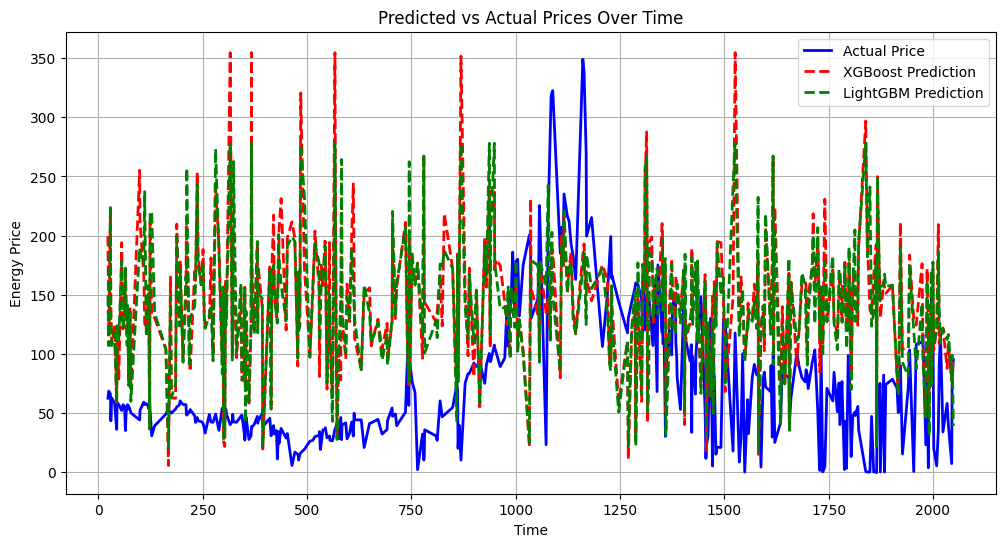

In [31]:
plt.figure(figsize=(12, 6))

plt.plot(time_series_sorted, y_test_sorted, label="Actual Price", color="blue", linewidth=2)
plt.plot(time_series_sorted, y_pred_xgb[sorted_indices], label="XGBoost Prediction", color="red", linestyle="dashed", linewidth=2)
plt.plot(time_series_sorted, y_pred_lgb[sorted_indices], label="LightGBM Prediction", color="green", linestyle="dashed", linewidth=2)

plt.xlabel("Time")
plt.ylabel("Energy Price")
plt.title("Predicted vs Actual Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()


## Peak analysis

In [32]:
# Analyze how many peaks, how many outliers


## Change of approach to use Memory (a sliding window) for "mini" models

In [65]:
# Read DB
csv_db_file = '../data/hour_14_metrics.csv'
df_sw = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df_sw = df[['Datetime', 'MarginalES']]

# Date range
start_date = '2018-01-01'
end_date = '2025-03-18'

subset_df = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

In [70]:
# # Function to create the weight matrix with the sliding window (collumns) of prices
# def create_weight_matrix(data, window_size):
#     X, y = [], []  # Initialize lists for input features (X) and target values (y)
    
#     for i in range(len(data) - window_size):
#         # Extract a window of size 'window_size' from the data
#         X.append(data.iloc[i:i+window_size, 1:].values.flatten())  
        
#         # The label is the value right after the current window
#         y.append(data.iloc[i + window_size, 1])  
    
#     # Convert the lists to DataFrame/Series for easier use in training
#     return pd.DataFrame(X), pd.Series(y)

def create_weight_matrix(data, window_size):
    """
    Creates a weight matrix where each row is a sliding window of prices,
    and a corresponding target vector containing the next price value.
    
    Parameters:
    - data: DataFrame with 'Datetime' and 'MarginalES' columns
    - window_size: Size of the sliding window
    
    Returns:
    - X: DataFrame with sliding windows as rows
    - y: Series with target values (next price after each window)
    """
    # Extract the MarginalES column (assuming it's the one we want)
    if 'MarginalES' in data.columns:
        prices = data['MarginalES'].values
    else:
        # Assume it's the second column (index 1)
        prices = data.iloc[:, 1].values
    
    # Create empty matrices
    X = np.zeros((len(prices) - window_size - 1, window_size))
    y = np.zeros(len(prices) - window_size - 1)
    
    # Fill the matrices with the sliding windows and targets
    for i in range(len(prices) - window_size - 1):
        X[i, :] = prices[i:i+window_size]  # Window of prices
        y[i] = prices[i+window_size]       # Next price after window
    
    # Convert to DataFrame/Series for easier use in training
    return pd.DataFrame(X), pd.Series(y)

In [71]:
### Short Stationarity (3 rowss)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")

print("____________ y_subset_to_trim")
print(y_subset_to_trim)
print("____________ END y_subset_to_trim")

# for i in range(y_subset_to_trim.size): # ???

# for loop - as many rows as available (y_subset_to_trim)
    # make subsets of however many rows as stationarity_depth indicates
    
    # train with subset
    # predict with the last row of the subset, with that model
    
    # save the predicted variable to a y_pred series

# compare y_subset_to_trim with y_pred in the available indexes

y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')  # Initialize y_pred with same index as y_subset_to_trim

# for i in range(y_subset_to_trim.size):
#     if i + stationarity_depth > y_subset_to_trim.size:
#         break  # Ensures we don't go out of bounds

#     # Make subsets of the specified depth
#     X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
#     print(X_train)
#     y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]
#     print(y_train)

#     # Train the model (Linear Regression in this example)
#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     # Predict with the last row of the subset
#     X_predict = X_subset_to_trim.iloc[i + stationarity_depth - 1].values.reshape(1, -1) #last row of training set
#     y_predict = model.predict(X_predict)[0]

#     # Save the predicted variable to y_pred
#     y_pred.iloc[i + stationarity_depth - 1] = y_predict

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)


____________ X_subset_to_trim
          0      1      2
0     66.58  67.20  68.12
1     67.20  68.12  64.64
2     68.12  64.64  57.39
3     64.64  57.39  63.91
4     57.39  63.91  65.22
...     ...    ...    ...
2048   7.10  77.32  77.87
2049  77.32  77.87  70.01
2050  77.87  70.01  95.12
2051  70.01  95.12  18.82
2052  95.12  18.82   0.00

[2053 rows x 3 columns]
____________ END X_subset_to_trim
____________ y_subset_to_trim
0       64.64
1       57.39
2       63.91
3       65.22
4       65.88
        ...  
2048    70.01
2049    95.12
2050    18.82
2051     0.00
2052    11.37
Length: 2053, dtype: float64
____________ END y_subset_to_trim
Actual vs Predicted:
      Actual    Predicted
0      64.64          NaN
1      57.39          NaN
2      63.91          NaN
3      65.22    81.413376
4      65.88    49.425326
...      ...          ...
2048   70.01    55.622843
2049   95.12    69.015961
2050   18.82    95.374644
2051    0.00   251.474146
2052   11.37  1554.216267

[2053 rows x 2 col

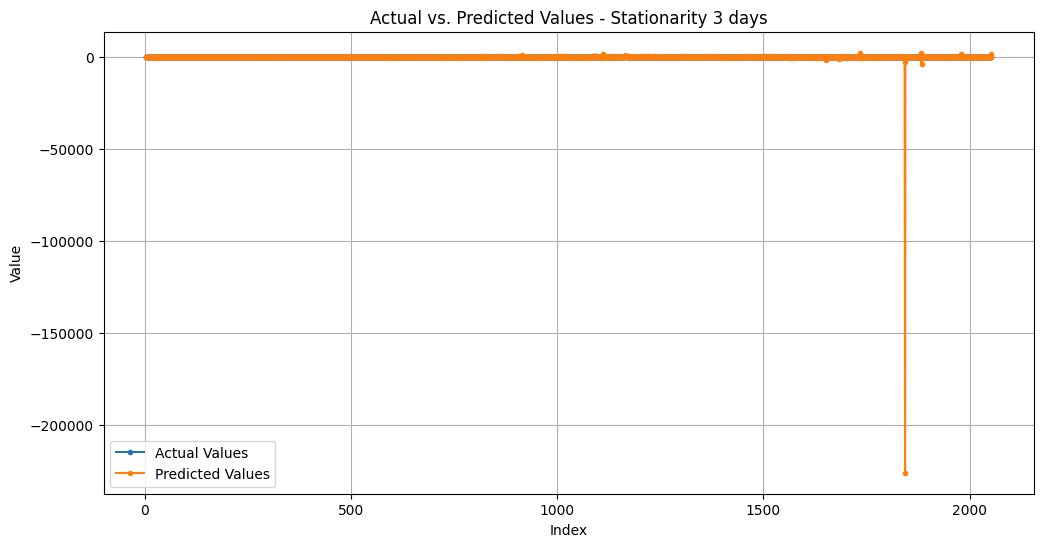

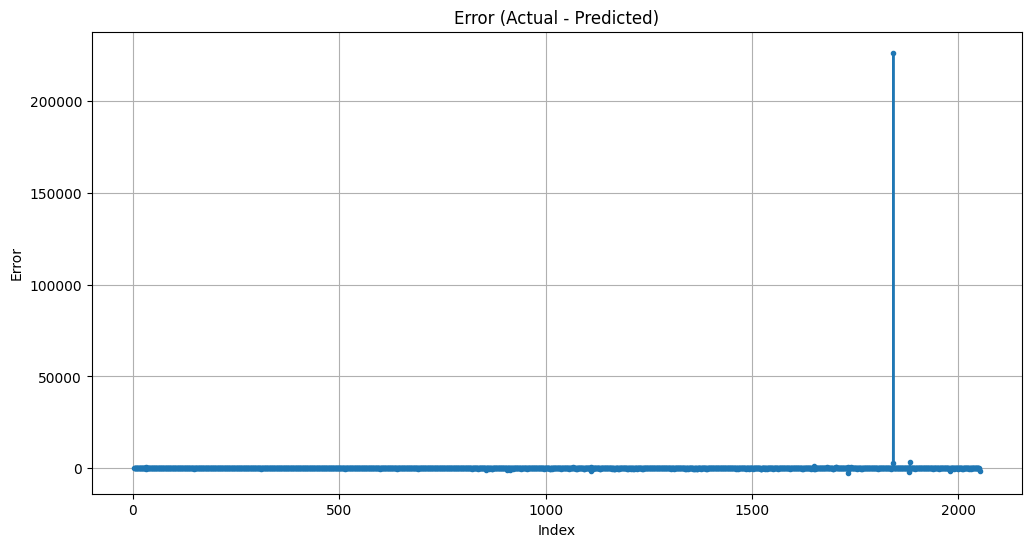

In [72]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(valid_actual.index, valid_actual.values, label='Actual Values', marker='.')
plt.plot(valid_pred.index, valid_pred.values, label='Predicted Values', marker='.')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values - Stationarity 3 days')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the error
error = valid_actual - valid_pred
plt.figure(figsize=(12, 6))
plt.plot(error.index, error.values, label='Error', marker='.')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error (Actual - Predicted)')
plt.grid(True)
plt.show()

In [73]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 365

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df, window_size)

# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

Actual vs Predicted:
      Actual  Predicted
0      64.64        NaN
1      57.39        NaN
2      63.91        NaN
3      65.22        NaN
4      65.88        NaN
...      ...        ...
2048   70.01  66.351580
2049   95.12  66.330114
2050   18.82  80.585850
2051    0.00  37.205547
2052   11.37  29.210258

[2053 rows x 2 columns]

Error:
365     -1.901615
366     -4.006672
367      3.052209
368     -1.206647
369     -8.198449
          ...    
2048     3.658420
2049    28.789886
2050   -61.765850
2051   -37.205547
2052   -17.840258
Length: 1688, dtype: float64


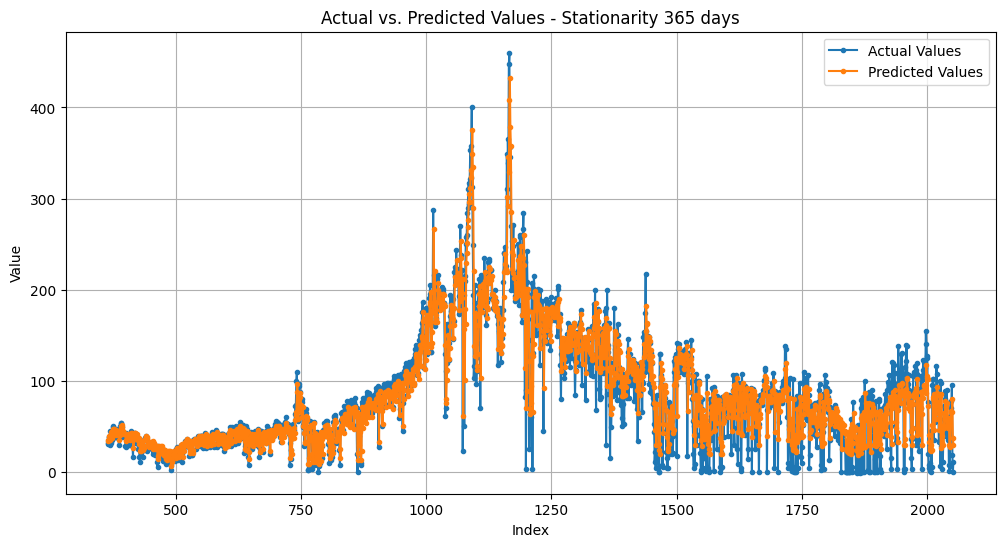

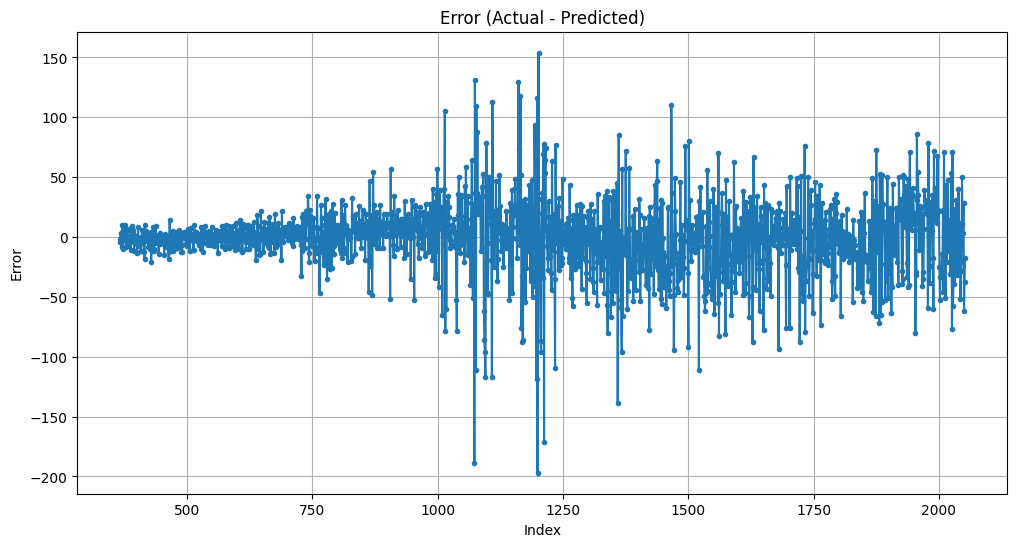

In [74]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(valid_actual.index, valid_actual.values, label='Actual Values', marker='.')
plt.plot(valid_pred.index, valid_pred.values, label='Predicted Values', marker='.')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values - Stationarity 365 days')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the error
error = valid_actual - valid_pred
plt.figure(figsize=(12, 6))
plt.plot(error.index, error.values, label='Error', marker='.')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error (Actual - Predicted)')
plt.grid(True)
plt.show()

Now using more features:

In [87]:
def create_weight_matrix(data, window_size, target_col='MarginalES'):
    """
    Creates a feature matrix X with sliding windows of the target column and all other features,
    and a corresponding target vector y containing the next price value.
    
    Parameters:
    - data: DataFrame with 'Datetime' and multiple feature columns
    - window_size: Size of the sliding window
    - target_col: Name of the column to predict (default: 'MarginalES')
    
    Returns:
    - X: DataFrame with sliding windows features
    - y: Series with target values (next price after each window)
    """
    # Remove datetime column if it exists
    if 'Datetime' in data.columns:
        data = data.drop('Datetime', axis=1)
    
    # Get the number of features (columns)
    n_features = data.shape[1]
    
    # Initialize empty lists
    X_data = []
    y_data = []
    
    # For each possible window start position
    for i in range(len(data) - window_size):
        # Get the window of data
        window = data.iloc[i:i+window_size]
        
        # Flatten the window into a single row
        row = window.values.flatten()
        
        # Add to X
        X_data.append(row)
        
        # Get the target value (next value of target column after window)
        y_data.append(data[target_col].iloc[i + window_size])
    
    # Convert to DataFrame and Series
    X_df = pd.DataFrame(X_data)
    y_series = pd.Series(y_data)
    
    return X_df, y_series

In [88]:
# Read DB w features
# csv_db_file = '../data/hour_14_metrics.csv'
csv_db_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'
df_sw = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df_sw = df[['Datetime', 'MarginalES']]

# Date range
start_date = '2018-01-01'
end_date = '2025-03-18'

subset_df_features = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

In [89]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df_features, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")

# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

____________ X_subset_to_trim
         0          1       2          3          4          5          6   \
0     66.58  66.410000  65.486  65.254286  65.138571  64.897667  64.722000   
1     67.20  66.806667  66.286  65.697143  65.027857  65.193333  64.748500   
2     68.12  67.300000  66.910  66.107143  65.175000  65.195000  65.007167   
3     64.64  66.653333  66.636  66.312857  65.188571  65.166333  65.018333   
4     57.39  63.383333  64.786  65.225714  64.780714  64.948000  64.804833   
...     ...        ...     ...        ...        ...        ...        ...   
2049  77.32  28.473333  30.646  34.094286  50.567857  54.205333  64.589500   
2050  77.87  54.096667  34.222  38.041429  50.970000  54.467667  64.137167   
2051  70.01  75.066667  46.660  43.015714  51.827857  52.917333  64.137333   
2052  95.12  81.000000  65.484  48.034286  52.265000  52.504667  65.664000   
2053  18.82  61.316667  67.828  49.605714  47.885714  50.532000  64.297500   

             7          8        

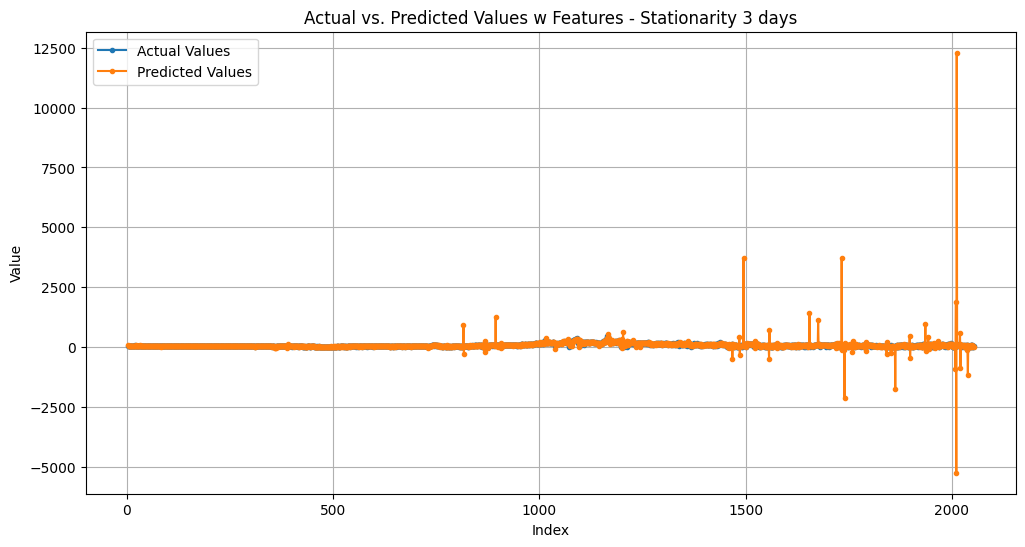

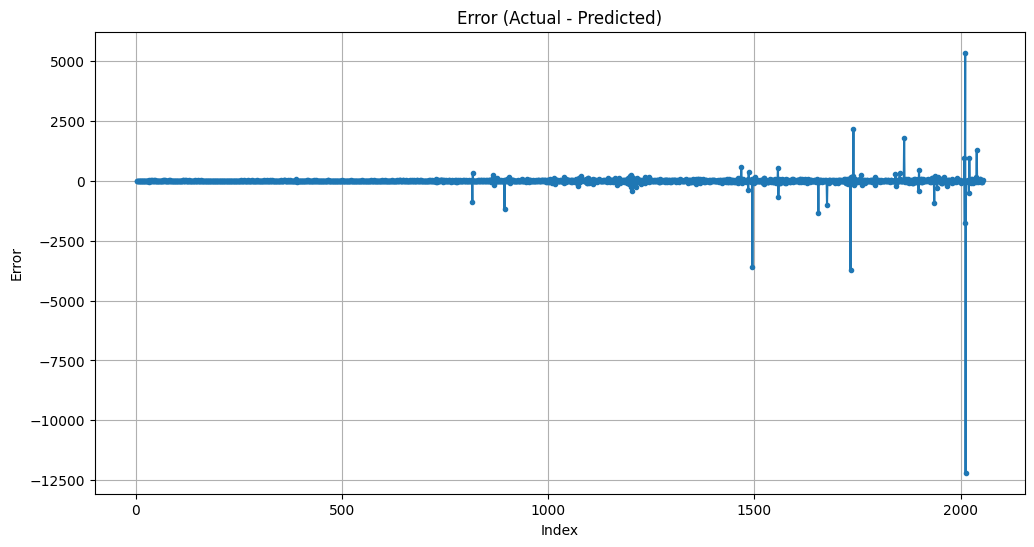

In [90]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(valid_actual.index, valid_actual.values, label='Actual Values', marker='.')
plt.plot(valid_pred.index, valid_pred.values, label='Predicted Values', marker='.')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values w Features - Stationarity 3 days')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the error
error = valid_actual - valid_pred
plt.figure(figsize=(12, 6))
plt.plot(error.index, error.values, label='Error', marker='.')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error (Actual - Predicted)')
plt.grid(True)
plt.show()

# # Plotting the actual vs. predicted values
# plt.figure(figsize=(12, 6))
# plt.plot(valid_actual.index, valid_actual.values, label='Actual Values', marker='.')
# plt.plot(valid_pred.index, valid_pred.values, label='Predicted Values', marker='.')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Actual vs. Predicted Values w Features - Stationarity 3 days')
# plt.legend()
# plt.grid(True)

# # Calculate the min and max of both datasets
# min_val = min(valid_actual.min(), valid_pred.min())
# max_val = max(valid_actual.max(), valid_pred.max())
# # Set y-axis limits to ±5 of the min/max values
# plt.ylim(min_val - 10000, max_val + 10000)
# plt.show()

# # Plotting the error
# error = valid_actual - valid_pred
# plt.figure(figsize=(12, 6))
# plt.plot(error.index, error.values, label='Error', marker='.')
# plt.xlabel('Index')
# plt.ylabel('Error')
# plt.title('Error (Actual - Predicted)')
# plt.grid(True)

# # Set y-axis limits to ±5 of the min/max error values
# plt.ylim(error.min() - 10000, error.max() + 10000)
# plt.show()

Now changing to Lasso for different weights

In [91]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df_features, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")


# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = Lasso()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

____________ X_subset_to_trim
         0          1       2          3          4          5          6   \
0     66.58  66.410000  65.486  65.254286  65.138571  64.897667  64.722000   
1     67.20  66.806667  66.286  65.697143  65.027857  65.193333  64.748500   
2     68.12  67.300000  66.910  66.107143  65.175000  65.195000  65.007167   
3     64.64  66.653333  66.636  66.312857  65.188571  65.166333  65.018333   
4     57.39  63.383333  64.786  65.225714  64.780714  64.948000  64.804833   
...     ...        ...     ...        ...        ...        ...        ...   
2049  77.32  28.473333  30.646  34.094286  50.567857  54.205333  64.589500   
2050  77.87  54.096667  34.222  38.041429  50.970000  54.467667  64.137167   
2051  70.01  75.066667  46.660  43.015714  51.827857  52.917333  64.137333   
2052  95.12  81.000000  65.484  48.034286  52.265000  52.504667  65.664000   
2053  18.82  61.316667  67.828  49.605714  47.885714  50.532000  64.297500   

             7          8        

c:\Users\PV783RR\OneDrive - EY\Documents\uc3m\TFG\TFG\.tfg_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.069e-02, tolerance: 2.598e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\PV783RR\OneDrive - EY\Documents\uc3m\TFG\TFG\.tfg_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e-02, tolerance: 2.757e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\PV783RR\OneDrive - EY\Documents\uc3m\TFG\TFG\.tfg_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number o

Actual vs Predicted:
      Actual   Predicted
0      64.64         NaN
1      57.39         NaN
2      63.91         NaN
3      65.22   64.747558
4      65.88   60.900660
...      ...         ...
2049   95.12   25.938950
2050   18.82  191.056898
2051    0.00  135.793834
2052   11.37 -743.109447
2053   50.24    4.126378

[2054 rows x 2 columns]

Error:
3         0.472442
4         4.979340
5        -1.750049
6         3.802163
7         4.257667
           ...    
2049     69.181050
2050   -172.236898
2051   -135.793834
2052    754.479447
2053     46.113622
Length: 2051, dtype: float64


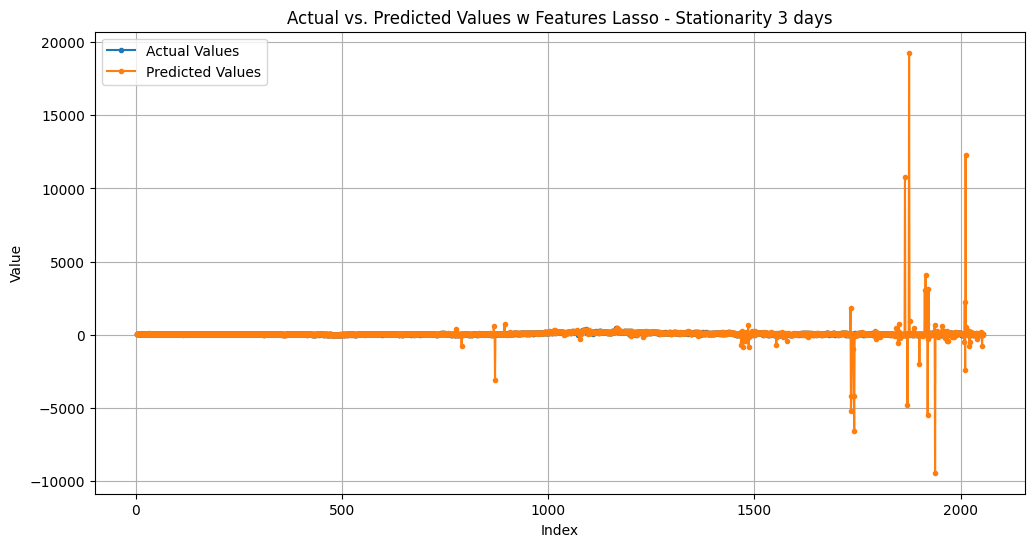

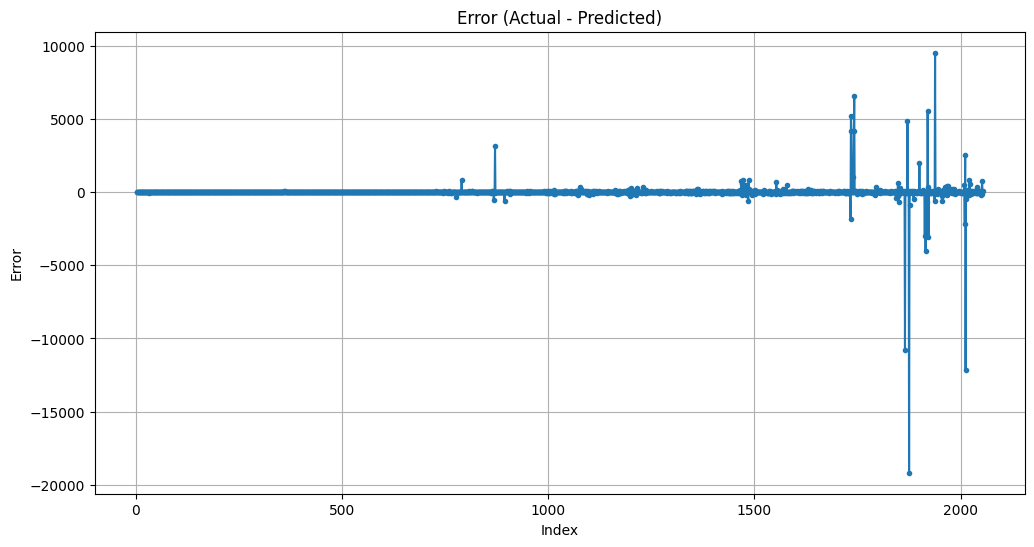

In [92]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(valid_actual.index, valid_actual.values, label='Actual Values', marker='.')
plt.plot(valid_pred.index, valid_pred.values, label='Predicted Values', marker='.')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values w Features Lasso - Stationarity 3 days')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the error
error = valid_actual - valid_pred
plt.figure(figsize=(12, 6))
plt.plot(error.index, error.values, label='Error', marker='.')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error (Actual - Predicted)')
plt.grid(True)
plt.show()